# Cocktail Clustering Project
**Exploratory data analysis and clustering of cocktail data using Machine Learning for the Solvro student research group.**

This notebook includes exploratory data analysis (EDA), data preprocessing, clustering with K-Means, and visualization of the results.

In [1]:
import sys
sys.path.append('../src')  # Adding path to the src folder
from cocktail_clustering_analysis import load_data, perform_eda, preprocess_data, apply_kmeans, reduce_dimensions
import matplotlib.pyplot as plt
import os
import warnings

# Configuration to suppress warnings
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

## 1. EDA (Exploratory Data Analysis)
**Goal**: Perform an initial exploration of the dataset to understand the distribution of categories, tags, and ingredients.

In [2]:
# Set the file path for the dataset
file_path = "../data/cocktail_dataset.json"
cocktail_data = load_data(file_path)

# Perform initial data analysis
perform_eda(cocktail_data)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               134 non-null    int64 
 1   name             134 non-null    object
 2   category         134 non-null    object
 3   glass            134 non-null    object
 4   tags             134 non-null    object
 5   instructions     134 non-null    object
 6   imageUrl         134 non-null    object
 7   alcoholic        134 non-null    int64 
 8   createdAt        134 non-null    object
 9   updatedAt        134 non-null    object
 10  ingredients      134 non-null    object
 11  num_ingredients  134 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 12.7+ KB

Missing Values:
 id                 0
name               0
category           0
glass              0
tags               0
instructions       0
imageUrl           0
alcoholic          0
createdAt     

## 2. Data Preprocessing
**Goal**: Prepare the data for clustering by encoding categorical variables and normalizing numerical values.

In [3]:
# Prepare data for clustering
normalized_df, cocktail_data_encoded = preprocess_data(cocktail_data)

## 3. Clustering
**Goal**: Use K-Means clustering to group cocktails based on their ingredients and characteristics.

In [4]:
# Apply K-Means clustering and evaluate results with Silhouette Score
labels, sil_score = apply_kmeans(normalized_df)
cocktail_data_encoded["cluster"] = labels
print(f"Silhouette Score (K-Means): {sil_score}")

Silhouette Score (K-Means): 0.38244956876573005


## 4. Visualization
**Goal**: Visualize the clusters in a 2D space using PCA for dimensionality reduction.

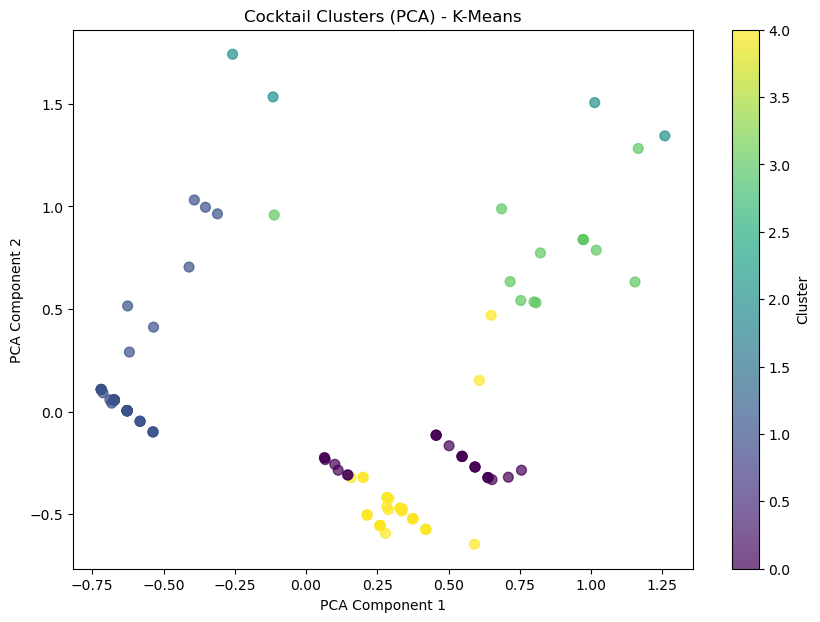

In [5]:
# Dimensionality reduction using PCA for visualization
pca_result = reduce_dimensions(normalized_df)

# Plot clusters based on PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap="viridis", s=50, alpha=0.7)
plt.title("Cocktail Clusters (PCA) - K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

## Summary and Insights
This project demonstrates the clustering of cocktail data using exploratory data analysis, data preprocessing, and K-Means clustering.

**Key insights:**
- The dataset was divided into 5 clusters based on cocktail ingredients and categories.
- The Silhouette Score indicates moderate separation between clusters, suggesting that the clustering is meaningful but could potentially be refined.

**Further improvements** could include experimenting with different clustering algorithms, fine-tuning the number of clusters, or using additional preprocessing techniques.

In [6]:
# Compute mean values for each cluster
numeric_columns_for_analysis = ["cluster", "num_ingredients", "category_Cocktail"]
tag_columns = [col for col in cocktail_data_encoded.columns if col.startswith("tag_")]
numeric_columns_for_analysis.extend(tag_columns)

# Create DataFrame with key columns for cluster analysis
cluster_analysis = cocktail_data_encoded[numeric_columns_for_analysis]
cluster_means = cluster_analysis.groupby("cluster").mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         num_ingredients  category_Cocktail  tag_Alcoholic  tag_Asia  \
cluster                                                                
0               3.875000           0.000000       0.000000  0.000000   
1               3.482143           0.035714       0.017857  0.000000   
2               4.500000           1.000000       1.000000  0.250000   
3               3.461538           0.000000       0.076923  0.000000   
4               4.864865           0.000000       0.000000  0.027027   

         tag_Beach  tag_Breakfast  tag_Brunch  tag_Chilli  tag_Christmas  \
cluster                                                                    
0         0.000000       0.041667    0.041667    0.000000           0.00   
1         0.053571       0.000000    0.000000    0.017857           0.00   
2         0.000000       0.000000    0.250000    0.000000           0.25   
3         0.000000       0.000000    0.000000    0.000000           0.00   
4         0.000000      